In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("week.csv", header=None, names=["time","counts","span"])

In [3]:
print(df)

            time   counts  span
0     1615042800  3641102   600
1     1615043400  3762153   600
2     1615044000  3488644   600
3     1615044600  3425204   600
4     1615045200  5906062   600
...          ...      ...   ...
1003  1615644600  3289105   600
1004  1615645200  3139526   600
1005  1615645800  3189467   600
1006  1615646400  3451376   600
1007  1615647000  3418822   600

[1008 rows x 3 columns]


In [4]:
import datetime

In [5]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

In [6]:
print(df['time'])

0      2021-03-06 15:00:00
1      2021-03-06 15:10:00
2      2021-03-06 15:20:00
3      2021-03-06 15:30:00
4      2021-03-06 15:40:00
               ...        
1003   2021-03-13 14:10:00
1004   2021-03-13 14:20:00
1005   2021-03-13 14:30:00
1006   2021-03-13 14:40:00
1007   2021-03-13 14:50:00
Name: time, Length: 1008, dtype: datetime64[ns]


In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

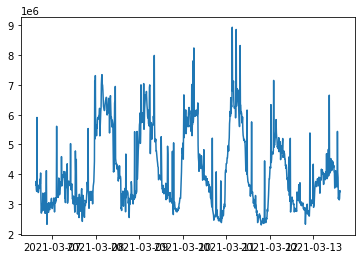

In [9]:
plt.plot(df['time'], df['counts'])

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [11]:
Q = df['counts']

In [12]:
# 欠損地を削除
P = Q.dropna()

In [13]:
size = int(len(P) * 0.5)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

In [14]:
print(P.dropna())

0       3641102
1       3762153
2       3488644
3       3425204
4       5906062
         ...   
1003    3289105
1004    3139526
1005    3189467
1006    3451376
1007    3418822
Name: counts, Length: 1008, dtype: int64


In [15]:
print(Q)

0       3641102
1       3762153
2       3488644
3       3425204
4       5906062
         ...   
1003    3289105
1004    3139526
1005    3189467
1006    3451376
1007    3418822
Name: counts, Length: 1008, dtype: int64


In [16]:
print(P)

0       3641102
1       3762153
2       3488644
3       3425204
4       5906062
         ...   
1003    3289105
1004    3139526
1005    3189467
1006    3451376
1007    3418822
Name: counts, Length: 1008, dtype: int64


In [17]:
size = int(len(P) * 0.5)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

In [19]:
a = []
for i in P:
    a.append(i)

In [20]:
P = []
for i in a:
    P.append(i)

In [21]:
size = int(len(P) * 0.66)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

In [22]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=6814748.612672, expected=6637047.000000
predicted=6844277.157500, expected=6874475.000000
predicted=6832007.637522, expected=6763063.000000
predicted=6782593.742250, expected=6576047.000000
predicted=6800756.171690, expected=6829771.000000
predicted=6739720.096858, expected=6475175.000000
predicted=6627779.749064, expected=6321622.000000
predicted=6517042.923391, expected=5972486.000000
predicted=6280478.997654, expected=5803773.000000
predicted=6069542.604724, expected=5600363.000000
predicted=5873035.260246, expected=6104063.000000
predicted=5968353.122468, expected=8321409.000000
predicted=7001636.212567, expected=6315864.000000
predicted=6624967.213085, expected=6318484.000000
predicted=6579016.113293, expected=6032768.000000
predicted=6328271.281336, expected=6085669.000000
predicted=6230418.911566, expected=6036358.000000
predicted=6237540.961335, expected=5885162.000000
predicted=6013394.684436, expected=5715378.000000
predicted=5891528.183558, expected=5925397.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5398703.374214, expected=5175689.000000
predicted=5305296.409128, expected=4908481.000000
predicted=5143279.577496, expected=4940333.000000
predicted=5076022.655529, expected=4966818.000000
predicted=5010216.917004, expected=4855836.000000
predicted=4941006.298284, expected=4994940.000000
predicted=4965499.543190, expected=5226147.000000
predicted=5063690.181375, expected=4758026.000000
predicted=4934561.829910, expected=4878174.000000
predicted=4926563.857887, expected=4769399.000000
predicted=4847299.593469, expected=5095906.000000
predicted=4962879.315362, expected=4982473.000000
predicted=4972560.580217, expected=4490630.000000
predicted=4761130.073264, expected=4720323.000000
predicted=4757649.056507, expected=4948818.000000
predicted=4823366.066917, expected=4796986.000000
predicted=4823304.651005, expected=4708205.000000
predicted=4778839.440191, expected=4739740.000000
predicted=4746391.018013, expected=5021855.000000
predicted=4870307.931543, expected=5199542.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3069560.490398, expected=3041632.000000
predicted=3066237.697440, expected=3069289.000000
predicted=3071501.778878, expected=2941770.000000
predicted=2998646.001601, expected=3005164.000000
predicted=3003220.167795, expected=2980016.000000
predicted=2988025.800559, expected=2999325.000000
predicted=2995768.557291, expected=3034137.000000
predicted=3009118.940277, expected=2846446.000000
predicted=2938131.860792, expected=2850982.000000
predicted=2906789.434828, expected=2852168.000000
predicted=2879578.607041, expected=2797597.000000
predicted=2845168.892334, expected=2795649.000000
predicted=2822733.934487, expected=2882909.000000
predicted=2840587.436628, expected=2818225.000000
predicted=2828766.228498, expected=2323237.000000
predicted=2620431.105596, expected=2605463.000000
predicted=2619794.830963, expected=2688611.000000
predicted=2633942.644596, expected=2804299.000000
predicted=2706374.094077, expected=2723513.000000
predicted=2703155.267080, expected=2840604.000000


In [25]:
import numpy as np

err = []
counter = 0 
for i in predictions:
        err.append(int(test[counter]-i))
        counter = counter + 1
                   
                   
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

print(test)

err2 = np.array(err)
print(err2)

Test MSE: 235250169402.881
[6637047, 6874475, 6763063, 6576047, 6829771, 6475175, 6321622, 5972486, 5803773, 5600363, 6104063, 8321409, 6315864, 6318484, 6032768, 6085669, 6036358, 5885162, 5715378, 5925397, 5493840, 5306576, 5243483, 5147062, 5138583, 5171482, 5094510, 5105696, 4871717, 4473845, 4104507, 4630157, 4618655, 4001553, 6154463, 3989028, 3865722, 3741929, 3728247, 3686519, 3599447, 3648140, 3626721, 3639331, 3593944, 3264646, 3481016, 3430528, 3405732, 5757516, 3392033, 3353910, 3410352, 3282184, 3224506, 3025164, 3156792, 3153971, 2918081, 2967335, 2866041, 3004253, 3286683, 3012561, 2961902, 2710102, 2781853, 2621633, 2642317, 2377301, 2498598, 2539792, 2527240, 2561906, 2614568, 2670036, 2565484, 2601170, 2480309, 2430907, 2399148, 2299279, 2379524, 2368972, 2408194, 2464838, 2517317, 2393432, 2349096, 2356812, 2354409, 2383089, 4448578, 2574343, 2395339, 2416073, 2376222, 2412352, 2524254, 2490972, 2582302, 2818836, 2751169, 2885448, 3086927, 3292707, 3566319, 3841514, 

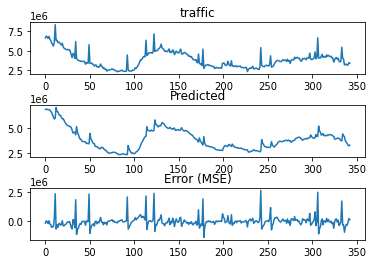

In [30]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3, 1, 1)
plt.title("traffic")
plt.plot(test)

plt.subplot(3, 1, 2)
plt.title("Predicted")
plt.plot(predictions)

plt.subplot(3, 1, 3)
plt.title("Error (MSE)")
plt.plot(err)

#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
plt.show()

In [31]:
print(len(P))

1008
